In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
dataset=pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.shape

(1599, 12)

In [6]:
types = dataset.dtypes
print(types)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

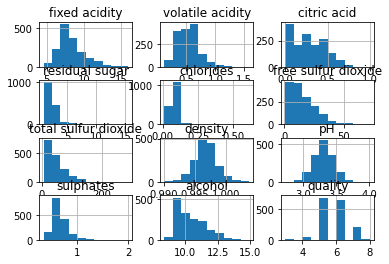

In [9]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

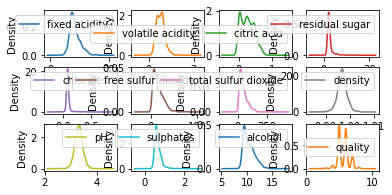

In [12]:
dataset.plot(kind='density' ,subplots=True, layout=(4,4), sharex=False)
pyplot.show()

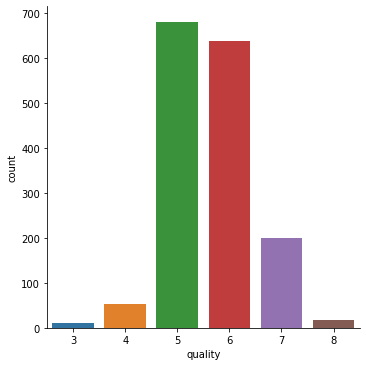

In [14]:
# number of values for each quality
sns.catplot(x='quality', data = dataset, kind = 'count')

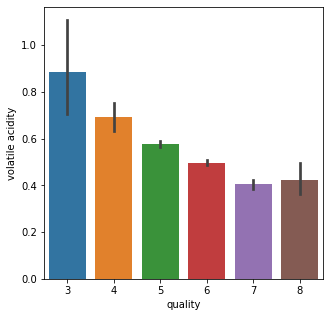

In [15]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data =dataset)

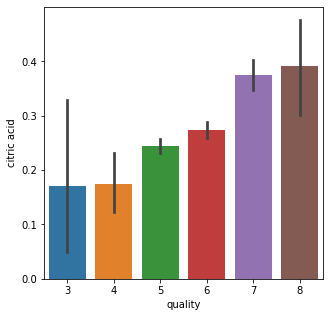

In [16]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = dataset)

In [18]:
correlation = dataset.corr()

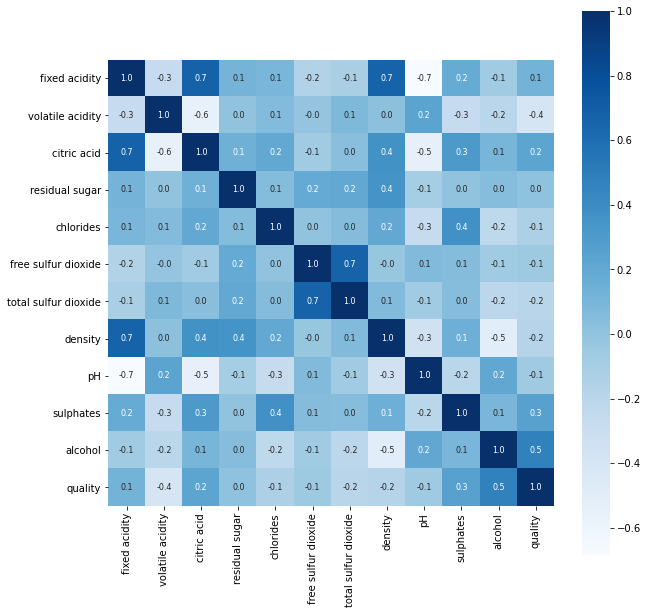

In [19]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [21]:
# separate the data and Label
X =dataset.drop('quality',axis=1)

In [22]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [23]:
Y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [26]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[276   7]
 [ 17  20]]


In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(Y_test, y_pred)*100))

Accuracy: 92.50


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 74.074


In [36]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall = recall_score(Y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 54.054


In [37]:
score = f1_score(Y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 62.500


In [48]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(model,open('/content/drive/My Drive/project2.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [42]:
import joblib
filename = '/content/drive/My Drive/project1.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.925


In [43]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/project2.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [46]:
!pip install streamlit

In [66]:
# Load the pickled model
import pickle
pickle_in = open("/content/drive/My Drive/project2.pkl","rb")
model=pickle.load(pickle_in)

In [88]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/project2.pkl","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/winequality-red.csv')



X = dataset.iloc[:,0:11].values

def predict_note_authentication(fixedacidity,volatileacidity,citricacid,	residualsugar,	chlorides,	freesulfurdioxide,	totalsulfurdioxide,	density,pH,sulphates,alcohol):
  output= model.predict([[fixedacidity,volatileacidity,citricacid,	residualsugar,	chlorides,	freesulfurdioxide,	totalsulfurdioxide,	density,pH,sulphates,alcohol]])
  print("Wine Quality =", output)
  if output==[1]:
    prediction="Good Quality Wine"
  else:
    prediction="Bad Quality Wine"
  print(prediction)
  return prediction
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Machine Learning Project</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Wine Quality Prediction")

    fixedacidity=st.number_input('Insert fixedacidity',0.0)
   
    volatileacidity=st.number_input('Insert volatileacidity',0.0)
    
    citricacid=st.number_input('Insert citricacid',0.0)
    residualsugar=st.number_input('Insert residualsugar',0.0)
    chlorides=st.number_input('Insert chlorides',0.0)
    freesulfurdioxide=st.number_input('Insert freesulfurdioxide',0.0)
    totalsulfurdioxide=st.number_input('Insert totalsulfurdioxide',0.0)
    density=st.number_input('Insert density',0.0)
    pH=st.number_input('Insert pH',0.0)
    sulphates=st.number_input('Insert sulphates',0.0)
    alcohol=st.number_input('Insert alcohol',0.0)

    resul=""
    if st.button("Predict"):
      result=predict_note_authentication(fixedacidity,volatileacidity,citricacid,	residualsugar,	chlorides,	freesulfurdioxide,	totalsulfurdioxide,	density,pH,sulphates,alcohol)
      st.success('Model has predicted = {}'.format(result))
    if st.button("About"):
      st.subheader("Developed by Priyanshu Jain")
      st.subheader("C-Section,PIET")

if __name__=='__main__':
  main()
   

Overwriting app.py


In [89]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [90]:
!pip install pyngrok

In [91]:
!ngrok authtoken 1rQ8XkYyUBK9R8KvW6wdVZD6HNI_44Zoypk4KP8df9VdpBAuQ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [92]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://7b3f-34-80-196-15.ngrok.io" -> "http://localhost:80">

In [93]:
 !streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.80.196.15:80

Wine Quality = [0]
Bad Quality Wine
Wine Quality = [0]
Bad Quality Wine
  Stopping...
